<a href="https://colab.research.google.com/github/FangmingXie/collab-workshop-st/blob/main/trash/solution6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6: Run through [Squidpy tutorials](https://squidpy.readthedocs.io/en/stable/tutorials.html) in Google Colab
- Squidpy ([Documentation](https://squidpy.readthedocs.io/en/stable/) and [Paper](https://www.nature.com/articles/s41592-021-01358-2)) is a python package for spatial transcriptome analysis. It is part of the [scverse](https://scverse.org/), which include many popular single-cell omics data analysis.  
- In particular, we will run through the tutorial for "Vizgen data" -- MERFISH data released by the company Vizgen. Link to the original tutorial is here: https://squidpy.readthedocs.io/en/stable/external_tutorials/tutorial_vizgen.html

# Install the `squidpy` package and its dependancies
- after the installation, load all the packages that are needed.

In [1]:
!pip install squidpy
!pip install scikit-misc
# !pip install 'scanpy[leiden]'
# !pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement squidp (from versions: none)
ERROR: No matching distribution found for squidp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import scanpy as sc
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

# Prepare and load the data
- Download the relevant data mannually from https://info.vizgen.com/mouse-brain-map
  - Use only `Slice1_Replicate1`. 
  - Download only the 3 files that are needed:
    `datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_by_gene_S1R1.csv`
    `datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_metadata_S1R1.csv`
    `datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_images_micron_to_mosaic_pixel_transform.csv`
  - Note that the last file is under the folder `images`
- Upload them here using the left side toolbar.
- Create an folder called `images`, and move the `xxx_images_micron_to_mosaic_pixel_transform.csv` file inside.

In [3]:
vizgen_dir = '/content' # this is specific for the google colab

adata = sq.read.vizgen(
    path=vizgen_dir,
    counts_file="datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_by_gene_S1R1.csv",
    meta_file="datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_metadata_S1R1.csv",
    transformation_file="datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_images_micron_to_mosaic_pixel_transform.csv",
)


# Follow the rest of the [original tutorial](https://squidpy.readthedocs.io/en/stable/external_tutorials/tutorial_vizgen.html) exactly as it is
- you should be able to run it through (by copy, past, and run its commands) without any adjustment.

In [ ]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"],percent_top=(50, 100, 200, 300), inplace=True)


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

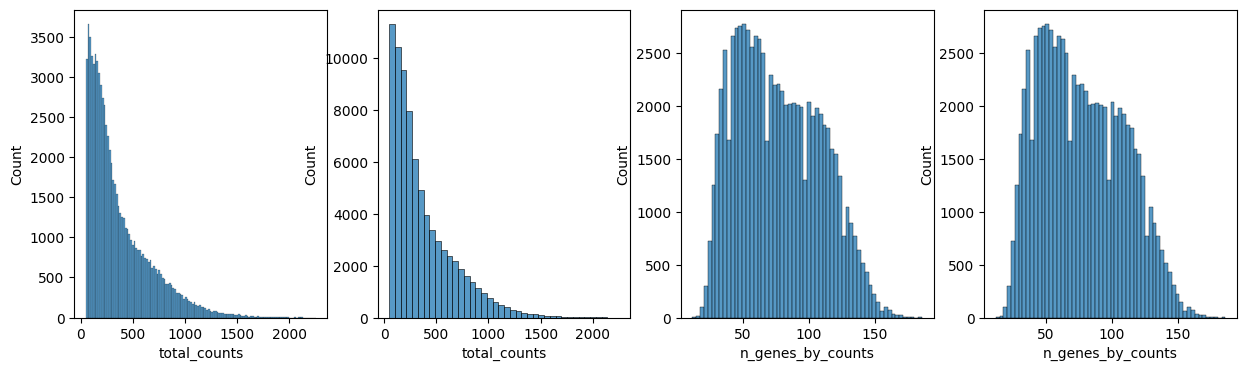

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    bins=60,
    ax=axs[2],
)
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [ ]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=10)

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)

In [ ]:
# this may have a glitch related to package installation - rerun it a second time will resolve it
sc.pp.neighbors(adata)

In [ ]:
# this may have a glitch related to package installation - rerun it a second time will resolve it
sc.tl.umap(adata)

In [ ]:
# this may have a glitch related to package installation - rerun it a second time will resolve it
sc.tl.leiden(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


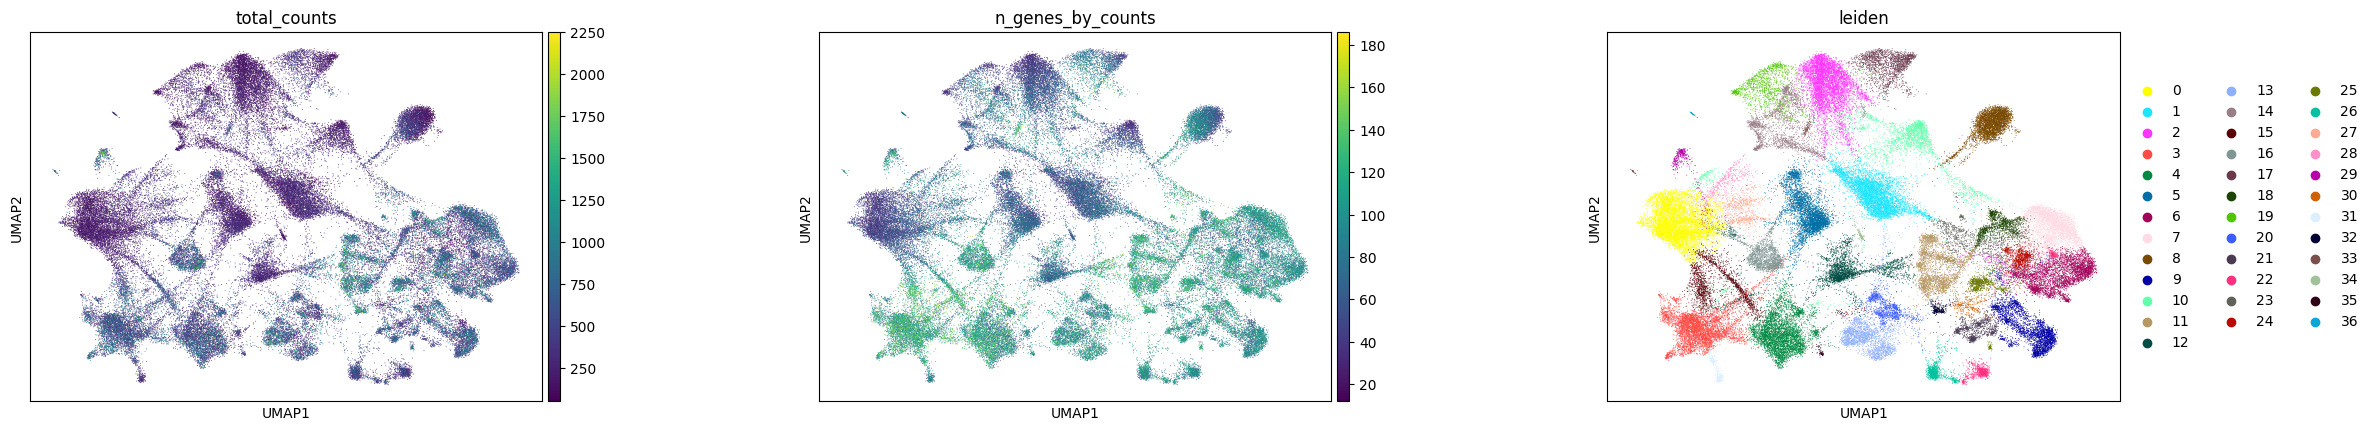

In [ ]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


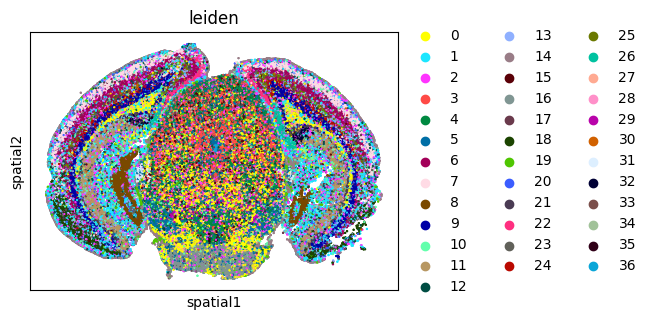

In [ ]:
sq.pl.spatial_scatter(adata, shape=None,color=[
        "leiden",
    ],
    wspace=0.4,)


In [ ]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [ ]:
sq.gr.centrality_scores(adata, cluster_key="leiden")

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


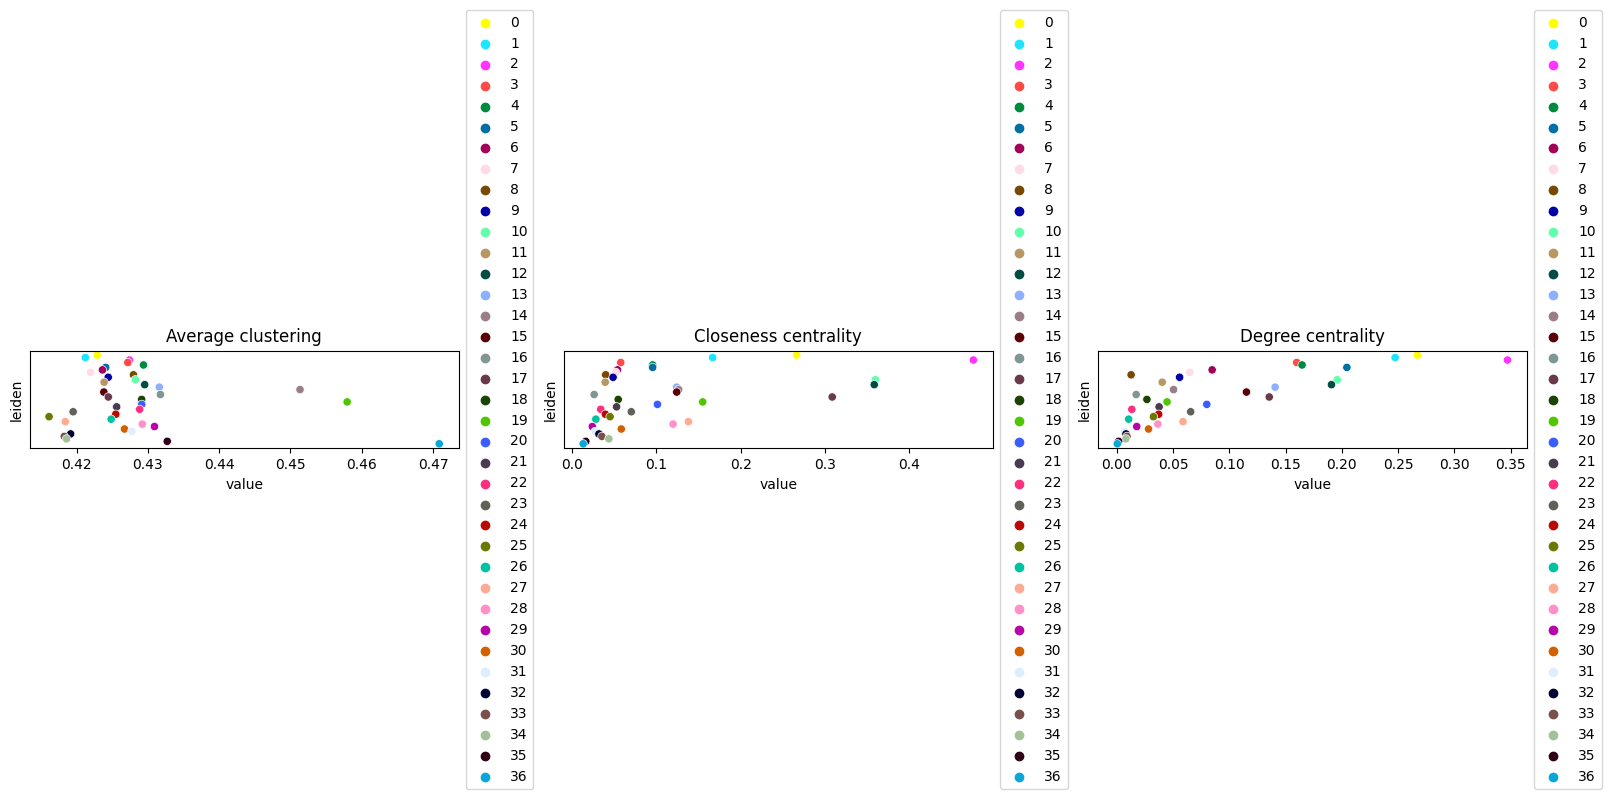

In [ ]:
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(16, 5))


In [ ]:
adata_subsample = sc.pp.subsample(adata, fraction=0.5, copy=True)

  0%|          | 0/210 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


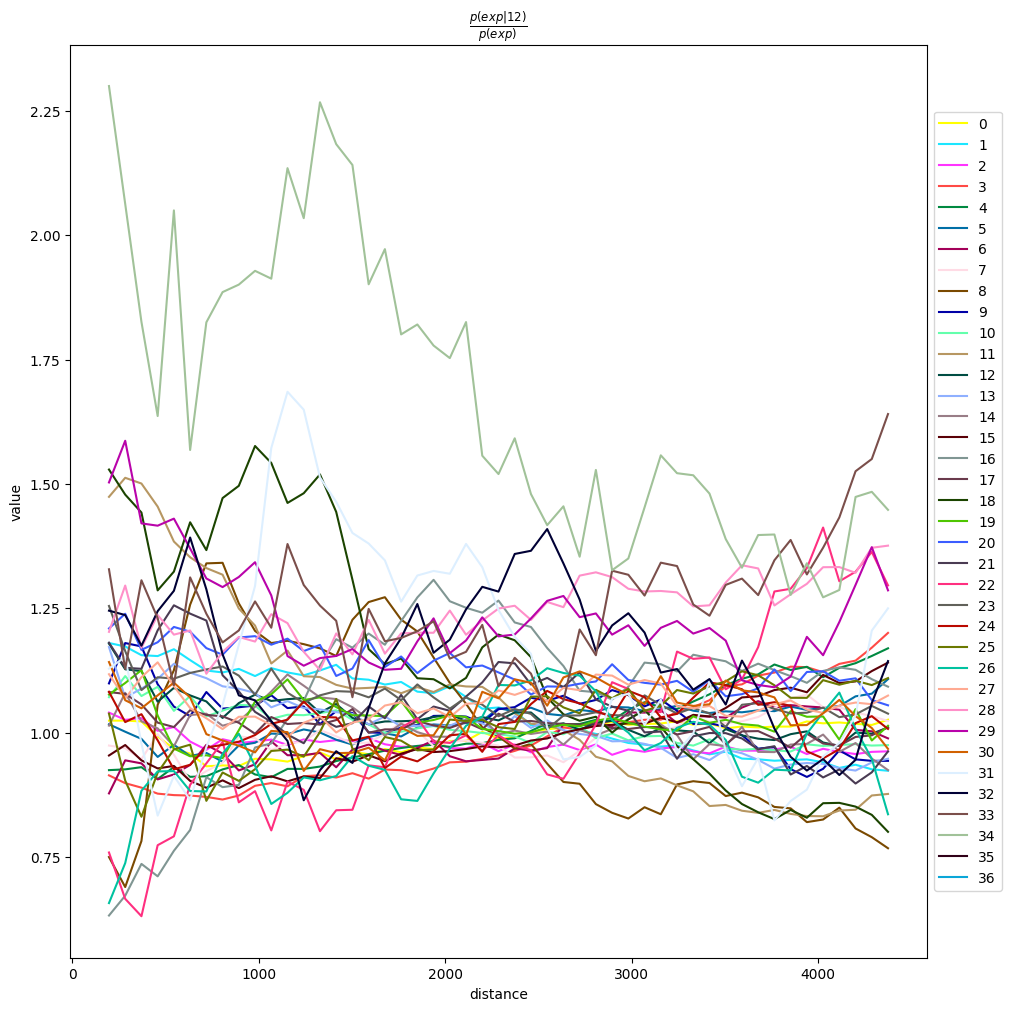

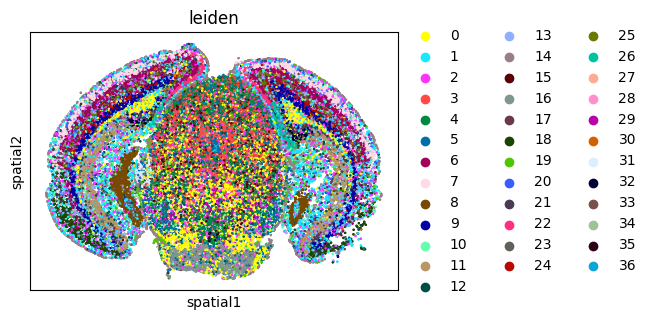

In [ ]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    shape=None,
    size=2,
)

In [ ]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

  0%|          | 0/1000 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


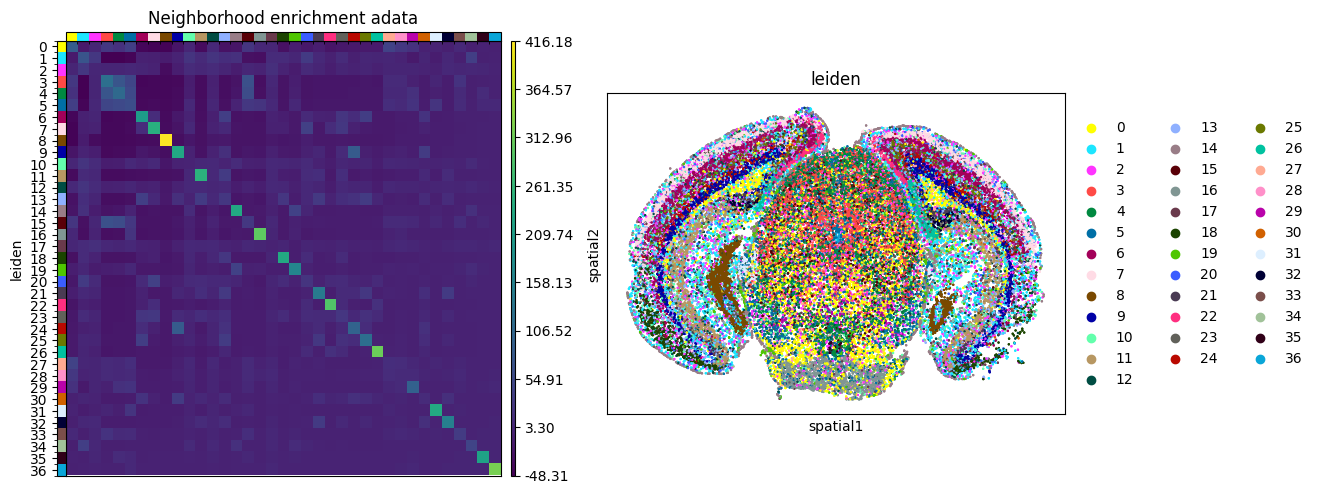

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=2, ax=ax[1])


/usr/local/lib/python3.10/dist-packages/squidpy/pl/_graph.py:307: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(y="stats", x="bins", ci="sd", alpha=0.01, color="gray", data=res["sims_stat"], ax=ax)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


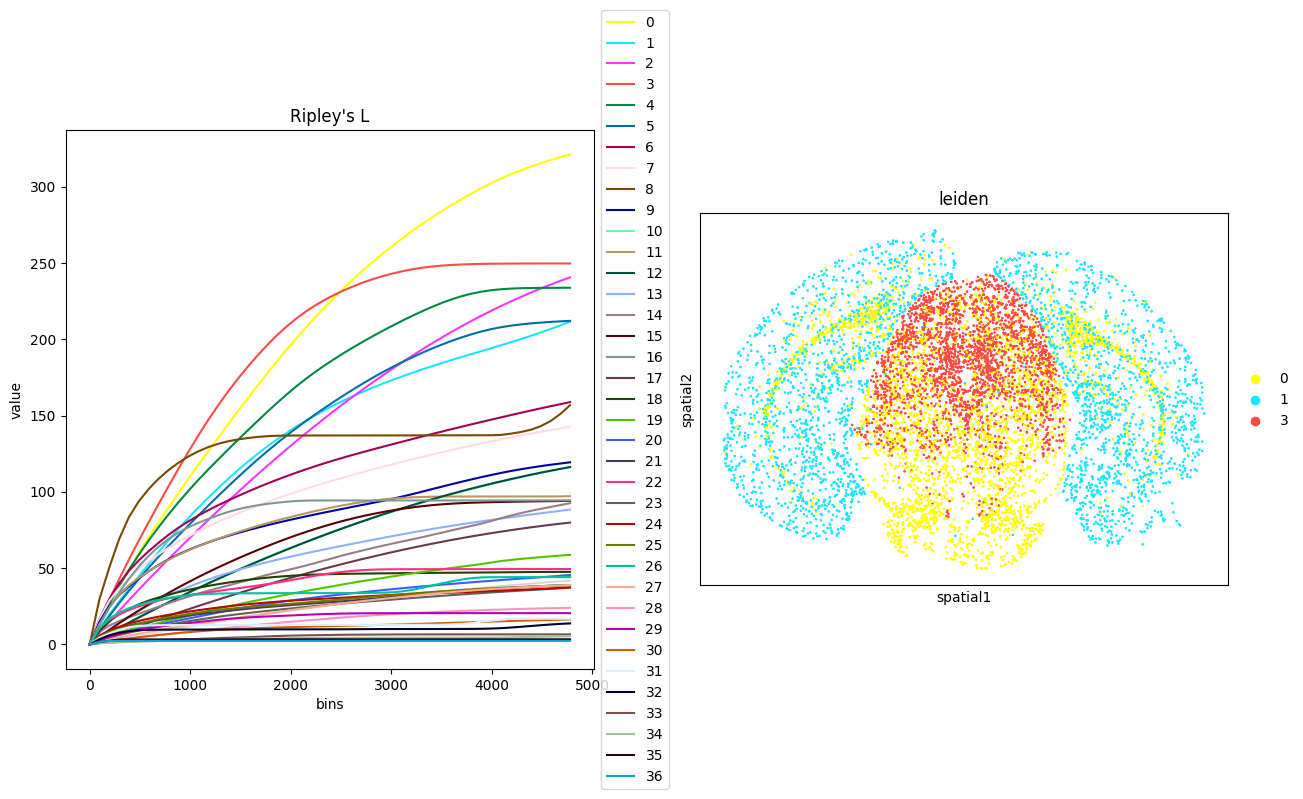

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
mode = "L"

sq.gr.ripley(adata, cluster_key="leiden", mode=mode)
sq.pl.ripley(adata, cluster_key="leiden", mode=mode, ax=ax[0])

sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    groups=["0", "1", "3"],
    shape=None,
    size=2,
    ax=ax[1],
)

In [ ]:
# this step takes long (a few minutes)
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subsample.uns["moranI"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
Slc17a7,0.699380,0.0,0.000009,0.0,0.009901,0.000016,0.0,0.0,0.012325
Chrm1,0.577472,0.0,0.000009,0.0,0.009901,0.000013,0.0,0.0,0.012325
Gfap,0.573752,0.0,0.000009,0.0,0.009901,0.000014,0.0,0.0,0.012325
Baiap2,0.460600,0.0,0.000009,0.0,0.009901,0.000012,0.0,0.0,0.012325
Mas1,0.415356,0.0,0.000009,0.0,0.009901,0.000014,0.0,0.0,0.012325
Grin2b,0.411849,0.0,0.000009,0.0,0.009901,0.000011,0.0,0.0,0.012325
Sstr4,0.401322,0.0,0.000009,0.0,0.009901,0.000012,0.0,0.0,0.012325
Glp2r,0.393550,0.0,0.000009,0.0,0.009901,0.000013,0.0,0.0,0.012325
Npy2r,0.377881,0.0,0.000009,0.0,0.009901,0.000012,0.0,0.0,0.012325
Gprc5b,0.375281,0.0,0.000009,0.0,0.009901,0.000015,0.0,0.0,0.012325


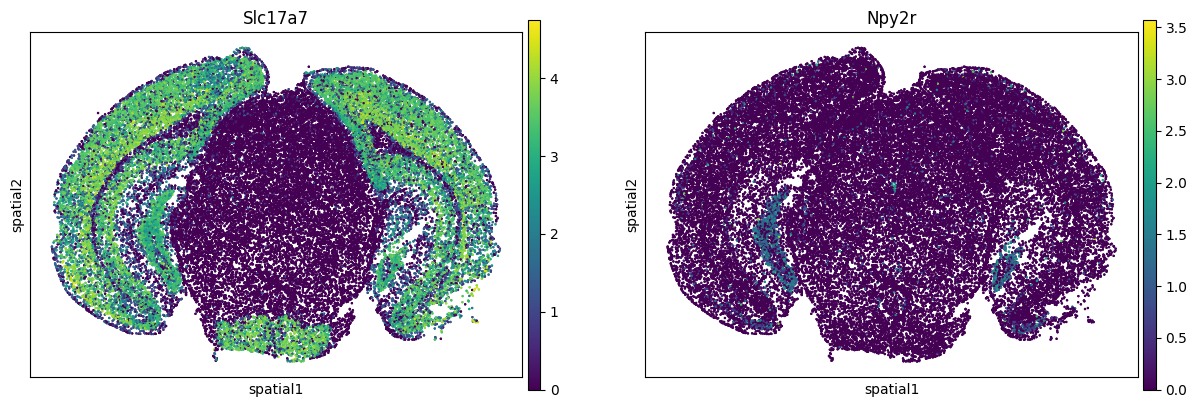

In [ ]:
sq.pl.spatial_scatter(
    adata_subsample,
    color=[
        "Slc17a7",
        "Npy2r",
    ],
    shape=None,
    size=2,
    img=False,
)